## Title :
Exercise: Поиск наилучшего k в kNN-регрессии

## Description :
Цель упражнения - найти значение k для модели с наилучшей производительностью по тестовому MSE.


## Описание данных:

## Instructions:
- Прочитайте данные в объект Pandas dataframe. 
- в качестве переменной отклика выберите столбец sales, а в качестве предикторной переменной - столбец TV budget.
- Выполните разбиение тренировки и теста с помощью sklearn.model_selection.train_test_split.
- Создайте список целочисленных значений k с помощью numpy.linspace .
- Для каждого значения k
- регрессия kNN на обучающем множестве.
- Вычислить MSE на тестовом множестве и сохранить его.
- Построить график значений MSE теста для каждого k.
- Найти значение k, соответствующее наименьшему тестовому MSE.


## Hints: 

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">train_test_split(X,y)</a>
Разбиение массивов или матриц на случайные обучающее и тестовое подмножества. 

<a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html" target="_blank">np.linspace()</a>
Возвращает равномерно распределенные числа в заданном интервале.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html" target="_blank">KNeighborsRegressor(n_neighbors=k_value)</a>
Регрессия на основе k-ближайших соседей. 


<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.predict" target="_blank">model.predict()</a>
Прогнозирование цели для предоставленных данных.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" target="_blank">mean_squared_error()</a>
Вычисляет среднюю квадратичную ошибку регрессии.

<a href="https://www.geeksforgeeks.org/python-dictionary-keys-method/?ref=lbp" target="_blank">dict.keys()</a>
Возвращает объект представления, отображающий список всех ключей в словаре.

<a href="https://www.programiz.com/python-programming/methods/dictionary/values" target="_blank">dict.values()</a>
Возвращает список всех значений, доступных в данном словаре.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">plt.plot()</a>
Построение графика зависимости y от x в виде линий и/или маркеров.

<a href="https://www.tutorialspoint.com/python/dictionary_items.htm" target="_blank">dict.items()</a>
Возвращает список кортежных пар dict (ключ, значение).


**Примечание:** Это упражнение оценивается автоматически, и вы можете попробовать выполнить несколько попыток.

In [1]:
#Импортировать необходимые библиотеки
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline


### Чтение стандартного рекламного набора данных

In [2]:
# Прочтите файл 'reckeding.csv' в набор данных Pandas
df = pd.read_csv('Advertising.csv')


In [3]:
# Посмотрите на данные
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [20]:
# Установите столбец «TV» в качестве переменной предиктора
x = df[['TV']]

# Установите столбец «Продажи» в качестве переменной ответа
y = df['Sales']


### Train-Test split (Разбиение данных на тестирование и обучение)

In [21]:
### edtest (test_shape) ###
# Разделите набор данных при обучении и тестировании с 60% обучающим набором и
# 40% набор тестирования
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=66)


In [22]:
### edtest (test_nums) ###
# Выбор K диапазон от 1 до 70
k_value_min = 1
k_value_max = 70
# Создайте список значений целого числа K между K_VALUE_MIN и
# k_value_max с использованием linspace
k_list = np.linspace(k_value_min, k_value_max, num = 70, dtype = int)
k_list


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])

### Model fit

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


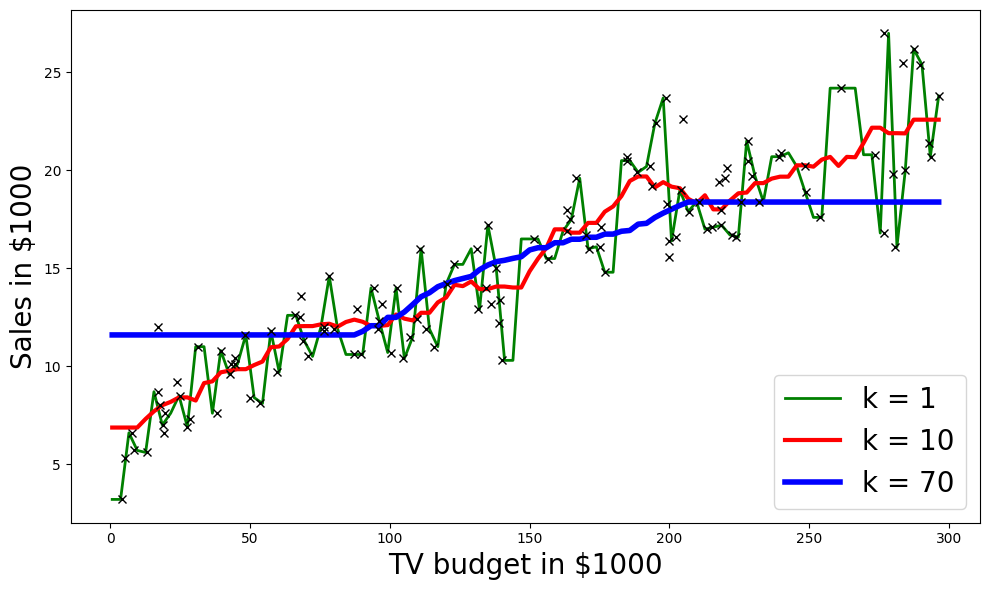

In [69]:
# Настройка сетки для построения данных и прогнозов
fig, ax = plt.subplots(figsize=(10,6))

# Переменная, используемая для изменения ширины линии значений моделей KNN
j=0

# Создайте пустой словарь, чтобы хранить значения MSE для каждого значения k
knn_dict = {}

# Цикл по всем значениям k (k_list = np.linspace(k_value_min, k_value_max, num = 70, dtype = int))
for k_value in k_list:
    # Создать регрессионную модель KNN для текущего k
    model = KNeighborsRegressor(n_neighbors=k_value)
    
    # Подгоните (обучите) модель на обучающих данных
    model.fit(x_train, y_train)
    
    # Используйте обученную модель для прогнозирования на тестовых данных
    y_pred = model.predict(x_test)
    
    # Рассчитайте MSE прогнозов тестовых данных
    MSE = mean_squared_error(y_test, y_pred)
    
    # Сохраните значения MSE каждого значения k в словаре
    knn_dict[k_value] = MSE
        
    # код для построения данных и различных прогнозов модели KNN
    colors = ['g','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(), x.max(), 100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2, color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()


### График

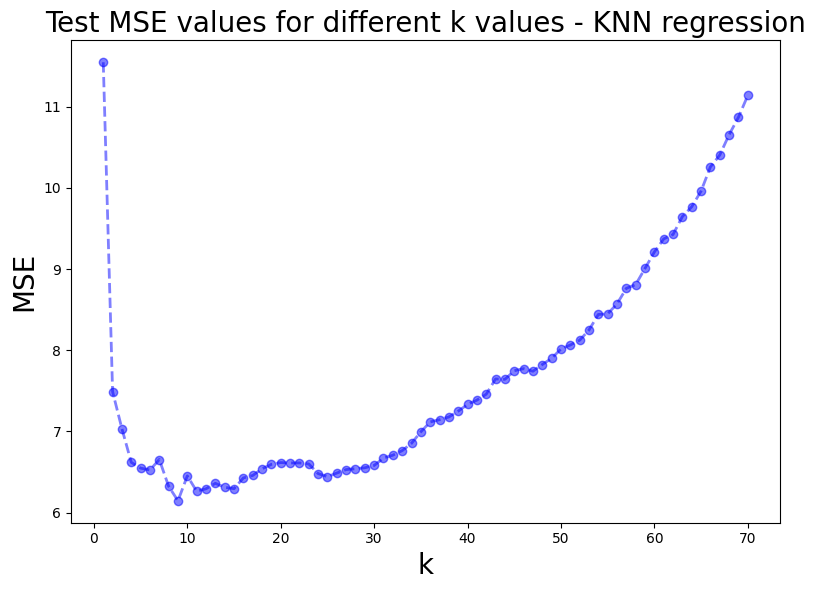

In [46]:
# Построить график, который изображает связь между значениями k и MSE
plt.figure(figsize=(8, 6))
# из словаря делаем список ключей (количество k) и список значений (MSE для каждого k из списка)
plt.plot(list(knn_dict.keys()), list(knn_dict.values()), 'bo--', alpha=0.5, linewidth=2)

# Установите метки заголовка и оси
plt.xlabel('k', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.title('Test MSE values for different k values - KNN regression', fontsize=20)
plt.tight_layout()

# Отобразить график
plt.show()


- plt.figure(figsize=(8, 6)) - Создается новая фигура для графика с размерами 8x6 дюймов.
- plt.plot(list(knn_dict.keys()), list(knn_dict.values()), 'k.-', alpha=0.5, linewidth=2) - Строится линия графика с использованием значений k из knn_dict на оси X и значений MSE на оси Y.
- plt.xlabel('k', fontsize=20) и plt.ylabel('MSE', fontsize=20) - Устанавливают метки для осей X и Y соответственно.
- plt.title('Test MSE values for different k values - KNN regression', fontsize=20) - Устанавливается заголовок графика.
- plt.tight_layout() - Обеспечивает компактное размещение элементов графика, чтобы избежать наложения текста или меток.
- plt.show() - Отображается сам график.

Обозначение 'k.-' в функции plt.plot() задает стиль линии графика. Каждый символ в строке 'k.-' имеет свое определенное значение:

   - 'k' - обозначает черный цвет (black) линии графика.
   - '.' - обозначает маркер точки.
   - '-' - обозначает сплошную линию графика.
   Вместо 'k.-' можно выбрать другие значения для создания красивого и информативного графика. Некоторые из доступных значения:

- 'b-' - синяя сплошная линия
- 'r-' - красная сплошная линия
- 'g-' - зеленая сплошная линия
- 'c-' - голубая сплошная линия
- 'm-' - пурпурная сплошная линия
- 'y-' - желтая сплошная линия
- 'k--' - черная пунктирная линия
- 'b:' - синяя пунктирная линия
- 'r:' - красная пунктирная линия
- 'g:' - зеленая пунктирная линия
- и другие...

Кроме того, можно использовать другие маркеры, чтобы указать точки данных:

- '.' - точка
- 'o' - большая точка
- '+' - плюс
- '*' - звезда
- 's' - квадрат
- и другие...

### Найти лучшую модель KNN

In [56]:
### edTest(test_mse) ###

# Найдите самый низкий MSE среди всех моделей KNN
min_mse = min(list(knn_dict.values()))

# Используйте понимание списка, чтобы найти значение k, связанное с самым низким MSE
best_model = [key  for (key, value) in knn_dict.items() if value == min_mse]
# Распечатайте лучшее k-значение
print ("The best k value is ", best_model[0],"with a MSE of ", min_mse)


The best k value is  9 with a MSE of  6.144391975308642


### ⏸ Из приведенных ниже вариантов, как бы вы классифицировали «качество» своей модели?

#### A. Хорошая
#### B. Удовлетворительная
#### C. Плохая

In [ ]:
### edTest(test_chow1) ###
# Отправьте выбор ответа в качестве строки ниже (например, если вы выберете опцию A, поместите «a»)
answer1 = 'B'


In [54]:
# Помощный код для вычисления R2_SCORE вашей лучшей модели
model = KNeighborsRegressor(n_neighbors = best_model[0])
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)

# Распечатайте оценку R2 модели
print(f"The R2 score for your model is {r2_score(y_test, y_pred_test)}")


The R2 score for your model is 0.7967532467913663


### ⏸ После наблюдения за значением $ r^2 $, как бы вы сейчас классифицировали свою модель?

#### A. Хорошая
#### B. Удовлетворительная
#### C. Плохая

In [1]:
### edTest(test_chow2) ###
# Отправьте выбор ответа в качестве строки ниже (например, если вы выберете опцию A, поместите «a»)
answer2 = 'B'
